**Question 1:** What is Boosting in Machine Learning? Explain how it improves weak learners.

Answer:

1. Boosting is an ensemble learning technique in machine learning where multiple weak learners (models that perform slightly better than random guessing) are combined sequentially to create a strong learner that has high predictive accuracy.

Weak learners are usually shallow decision trees.

Unlike Bagging (where models are independent), Boosting trains models one after another, with each new model focusing on the mistakes of the previous ones.

2. Key Idea Behind Boosting

“Focus on the errors of previous models and improve step by step.”

Each model tries to correct the errors made by the previous model.

The predictions of all models are combined (weighted sum or vote) to produce the final prediction.

This way, even if individual models are weak, together they form a strong, accurate model.

3. How Boosting Improves Weak Learners

Sequential Training:

First model fits the data.

Identify the samples it predicts incorrectly.

Give these misclassified samples higher weights for the next model.

Weighted Contribution:

Each weak learner is assigned a weight based on its accuracy.

Better-performing models contribute more to the final prediction.

Error Reduction:

By focusing on hard-to-predict examples, Boosting reduces bias (underfitting) and improves accuracy.


**Question 2:** What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer:
1. AdaBoost (Adaptive Boosting)

Training approach:

Start with equal weights for all training samples.

Train a weak learner (usually a shallow decision tree).

Increase weights of misclassified samples, so the next learner focuses more on these “hard” cases.

Each learner is assigned a weight based on its accuracy.

Final model = weighted vote (classification) or weighted sum (regression).

Key Idea: Adapt sample weights → misclassified points get higher importance.

2. Gradient Boosting

Training approach:

Start with a simple model (e.g., a constant prediction like mean for regression).

Compute the residual errors (difference between actual and predicted values).

Train the next weak learner to predict these residuals (gradients of loss function).

Update the model by adding the new learner’s predictions (with a learning rate).

Repeat until convergence.

Key Idea: Optimize the loss function by fitting new learners to the gradients of errors, not by reweighting samples.

**Question 3:** How does regularization help in XGBoost?

Answer:

1. What is XGBoost?

XGBoost (Extreme Gradient Boosting) is a powerful implementation of gradient boosting that is optimized for speed, scalability, and accuracy.

A key feature of XGBoost compared to standard Gradient Boosting is its built-in regularization.

2. Why Regularization Matters

Boosting models (like Gradient Boosting) are prone to overfitting, especially when:

Trees are too deep

Too many boosting rounds are used

Data has noise

Regularization helps by penalizing model complexity, making the model more generalizable.

3. How XGBoost Uses Regularization

XGBoost adds a regularization term to its objective function:

 → L2 regularization on leaf weights

Prevents overly large predictions from leaves.

Shrinks weights, reducing overfitting.

Additionally:

XGBoost also supports L1 regularization (α) on leaf weights → encourages sparsity (some weights become 0).

4. Regularization Parameters in XGBoost

lambda (reg_lambda): L2 regularization term on weights

alpha (reg_alpha): L1 regularization term on weights

gamma (min_split_loss): Minimum loss reduction required to split a node → prevents unnecessary splits

5. Intuition

Without regularization → trees might grow too complex, fitting noise.

With regularization → trees are simpler, more robust, and less likely to overfit.

**Question 4:** Why is CatBoost considered efficient for handling categorical data?

Answer:
1. Traditional Problem with Categorical Data

Most machine learning models (including standard Gradient Boosting) cannot handle categorical features directly.

They require preprocessing, like:

One-hot encoding → can explode feature space for high-cardinality categories

Label encoding → can introduce artificial ordinal relationships

Both approaches have drawbacks: inefficiency, high memory usage, or bias.

2. How CatBoost Handles Categorical Data

CatBoost introduces a technique called “Ordered Target Encoding” (or mean encoding with ordering) that allows it to handle categorical features natively.

Key points:

Transforms categories into numbers internally using the target variable.

Avoids target leakage by using an ordered boosting process, where the target statistic for a row is computed only from previous rows.

Handles high-cardinality features efficiently without exploding the feature space.

Automatically deals with missing values in categorical features.

3. Advantages

No need for extensive preprocessing (less memory, less computation).

Reduces overfitting compared to standard target encoding.

Works well with datasets that have many categorical features.

Often performs better out-of-the-box compared to XGBoost or LightGBM on categorical-heavy datasets.

4. Intuition

Suppose you have a feature City and the target is Loan Default.

CatBoost will encode “City” based on the historical average default rate, but in an ordered fashion so that it doesn’t leak future information during training.

This avoids introducing bias or overfitting while still capturing predictive information.


**Question 5:** What are some real-world applications where boosting techniques are preferred over bagging methods?

Answer:
1. Credit Scoring and Loan Default Prediction

Why Boosting?

Boosting (e.g., XGBoost, LightGBM, CatBoost) is very good at detecting rare events like defaults.

It focuses on misclassified examples, so it can capture subtle patterns in borrowers with higher default risk.

Example: Banks predicting whether a customer will default on a loan using demographic and transaction history.

2. Fraud Detection

Why Boosting?

Fraudulent transactions are rare and complex patterns.

Boosting’s sequential training helps focus on these rare, hard-to-detect cases.

Example: Credit card fraud detection, insurance claim fraud.

3. Marketing and Customer Churn Prediction

Why Boosting?

Boosting can model complex non-linear relationships in customer behavior.

It handles imbalanced datasets well (e.g., only a small fraction of customers churn).

Example: Telecom companies predicting customer churn to offer retention incentives.

4. Online Advertising and Click-Through Rate (CTR) Prediction

Why Boosting?

Boosting can capture subtle interactions between user features and ad features.

Many advertising platforms use LightGBM or XGBoost to predict which users are likely to click an ad.

5. Healthcare Risk Prediction

Why Boosting?

Patient risk datasets often have imbalanced outcomes (e.g., predicting rare diseases).

Boosting can focus on misclassified high-risk cases and improve detection accuracy.

Example: Predicting which patients are at risk of readmission or complications.

6. Key Reasons Boosting is Preferred

Handles imbalanced datasets better (rare events).

Reduces bias by combining weak learners sequentially.

Captures subtle patterns that bagging might miss.

Often achieves higher predictive accuracy than bagging on complex datasets.

Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.

**Question 6:** Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
(Include your Python code and output in the code box below.)

Answer:

Explanation

Dataset: load_breast_cancer() provides features and labels for classification.

Train-test split: 70% training, 30% testing, stratified to preserve class distribution.

AdaBoost: Uses default Decision Stumps as weak learners.

Evaluation: Accuracy is computed on the test set.

In [11]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train an AdaBoost Classifier
ada = AdaBoostClassifier(
    n_estimators=100,   # number of weak learners
    learning_rate=1.0,  # step size
    random_state=42
)
ada.fit(X_train, y_train)

# 4. Make predictions
y_pred = ada.predict(X_test)

# 5. Print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Classifier: {accuracy:.3f}")


Accuracy of AdaBoost Classifier: 0.953


**Question 7:** Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score.

Answer:

Explanation

Dataset: fetch_california_housing() provides numerical features for regression.

Train-test split: 80% training, 20% testing.

Gradient Boosting: Combines many shallow trees sequentially to reduce bias and improve predictions.

Evaluation: r2_score measures how well the model predicts the variance in the target; 1.0 is perfect prediction.

In [12]:
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,      # number of boosting stages
    learning_rate=0.1,     # step size
    max_depth=3,           # max depth of individual trees
    random_state=42
)
gbr.fit(X_train, y_train)

# 4. Make predictions
y_pred = gbr.predict(X_test)

# 5. Evaluate performance using R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared score of Gradient Boosting Regressor: {r2:.3f}")


R-squared score of Gradient Boosting Regressor: 0.776


**Question 8:** Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

Answer:

Explanation

Dataset: Breast Cancer dataset for binary classification.

XGBoost: Powerful gradient boosting implementation.

Hyperparameter tuning: learning_rate controls how much each tree contributes; GridSearchCV finds the best value.

Evaluation: Accuracy is computed on the test set using the tuned model.


In [17]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Define XGBoost classifier
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 4. Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 5. GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 6. Best parameters and final accuracy
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Learning Rate:", best_params['learning_rate'])
print(f"Accuracy on Test Set: {accuracy:.3f}")


Best Learning Rate: 0.3
Accuracy on Test Set: 0.965


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:13:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Question 9:** Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn

Answer:

Explanation

CatBoostClassifier: Handles categorical and numerical data efficiently (here all features are numerical).

Confusion Matrix: Shows the number of true positives, false positives, true negatives, and false negatives.

Seaborn heatmap: Provides a clear visual representation of model performance.

In [18]:
!pip install catboost


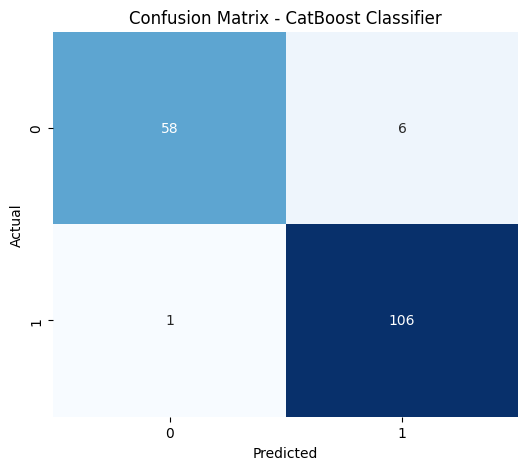

In [19]:
# Import libraries

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train CatBoost Classifier
catboost_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=4,
    verbose=0,         # Suppress training output
    random_seed=42     # Correct parameter for reproducibility
)
catboost_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = catboost_model.predict(X_test)

# 5. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Plot confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()



**Question 10:** You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

Answer:
1. Data Preprocessing & Handling Missing/Categorical Values

Understand the dataset

Identify numeric vs categorical features.

Check missing values and class imbalance.

Handle missing values

Numeric features: impute using median (robust to outliers).

Categorical features: impute using mode or a special category like "Unknown".

Encode categorical features

For AdaBoost/XGBoost:

Use One-Hot Encoding for low-cardinality categories.

Use Target/Ordinal Encoding for high-cardinality categories.

For CatBoost:

Pass categorical columns directly → CatBoost handles them natively with ordered target encoding.

Feature scaling

Boosting trees usually don’t require scaling, so standardization is optional.

Handle class imbalance

Use techniques like:

SMOTE / ADASYN to oversample minority class.

Class weights in the boosting model (most boosting frameworks support this).

2. Choice of Boosting Algorithm
Algorithm	Pros for this scenario
AdaBoost	Simple, interpretable, works with small datasets, but may struggle with missing values and high-cardinality categorical features.
XGBoost	Fast, robust, handles numeric and encoded categorical features, supports regularization to prevent overfitting.
CatBoost	Handles categorical features natively, robust to missing values, less hyperparameter tuning required, often best for datasets with mixed feature types and imbalances.

Step: For this dataset, CatBoost is the most efficient because it natively handles both categorical features and missing values, and works well with imbalanced classes.

3. Hyperparameter Tuning Strategy

Select key hyperparameters

Number of trees (iterations / n_estimators)

Tree depth (depth / max_depth)

Learning rate (learning_rate)

Regularization parameters (l2_leaf_reg for CatBoost, lambda/alpha for XGBoost)

Subsampling (subsample, colsample_bytree)

Tuning approach

Use GridSearchCV or RandomizedSearchCV with stratified k-fold cross-validation.

Focus on metrics suitable for imbalanced datasets (see below).

Early stopping

Monitor validation set performance to stop training before overfitting.

4. Evaluation Metrics

Since the dataset is imbalanced, accuracy alone is insufficient. Focus on:

ROC-AUC → measures overall model discrimination between default vs non-default.

Precision & Recall → capture performance on the minority class (defaults).

F1-score → balances precision and recall for actionable insights.

Confusion Matrix → helps visualize true positives, false positives, etc.

In credit risk, false negatives (predicting no default when default occurs) are costlier than false positives, so recall for the default class is particularly important.

5. How the Business Benefits

Reduce financial risk → identify high-risk borrowers before issuing loans.

Better customer targeting → allocate risk-based interest rates or require additional collateral.

Regulatory compliance → boosting models (especially tree-based) allow feature importance analysis, improving transparency for audits.

Optimized operations → resources (loan approval checks, fraud investigations) can be focused on high-risk cases.

6. Example Workflow (Pseudo-Code)

In [20]:
# Import libraries
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# Example: assume df is your loan dataset
# df = pd.read_csv("loan_data.csv")
# X = df.drop("default", axis=1)
# y = df["default"]

# For illustration, let's create dummy data
import numpy as np
X = pd.DataFrame(np.random.rand(1000, 10), columns=[f"feature_{i}" for i in range(10)])
y = np.random.randint(0, 2, 1000)
categorical_columns = []  # list indices of categorical columns if any

# 1. Handle missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=4,
    eval_metric='AUC',
    cat_features=categorical_columns,
    verbose=0,
    random_seed=42
)
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# 4. Evaluate
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

# 5. Print metrics
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}")
print("Confusion Matrix:\n", conf_matrix)



ROC-AUC: 0.521
Precision: 0.495, Recall: 0.331, F1-score: 0.397
Confusion Matrix:
 [[110  48]
 [ 95  47]]
